## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
print("Hi This Project is sales DATA analysis of whole year using PANDA Library  ")

Hi This Project is sales DATA analysis of whole year using PANDA Library  


import file of one month sale january, Just copy/paste file address line from input data

In [3]:

ap = pd.read_csv("../input/year-data-sale/Sales_April_2019.csv")
ap.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# Check shape of data in ap file
print('shape of ap', ap.shape)

shape of ap (18383, 6)


Import multiple files from input data set

In [5]:


files = [file for file in os.listdir('../input/year-data-sale')]
for file in files: 
    print(file)


Sales_August_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_July_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_December_2019.csv


to mearge all data file and make a one big data file, 
keep in mind to put last "/" in line "(df = pd.read_csv("../input/year-data-sale/"+file)"

In [6]:


# providing empty dataframe to read the data
year_data = pd.DataFrame()

# now giving for loop to read and mearge all files
for file in files: 
    dd = pd.read_csv("../input/year-data-sale/"+file)
    year_data = pd.concat([year_data, dd])

year_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


to remove the index numbring from file

#year_data.to_csv("year_data.csv", index = False)

know the shape of data

In [7]:
print('shape of year data', year_data.shape)

shape of year data (186850, 6)


# DATA cleaning section!


remove all NAN rows from panadas data frame (that is sales data set we uploaded)

standared sytex => df1 = df[df.isna().any(axis =1)]

df1 = new name for data set

df =>  give here your data frame name that you used in previos lines

axis = 1 means => rows

remaining are builtin commands in this syntax

In [8]:
nan_rows = year_data[year_data.isna().any(axis =1)]
nan_rows.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN


Drop the rows that all fully filled with NAN

for rows partially filled with NAN we use other statistical methods like mean, median, mode etc


standard syntex=> df = df.dropna(condition)

In [9]:
year_data = year_data.dropna(how = 'all')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


Just for check we will run again the previous code (line 11) to check the fully filled NAN rows and the result will be none means no fully filled NAN rows


in line 12 if we use "any" instead of "all" that will cause another error in data frame

with using "any" it will remove any NAN value (also from partially filled rows with NAN) so it will make data having uneven columns length

to avoid this we used "all" means only drop that rows that are having all values NAN



In [10]:
nan_rows = year_data[year_data.isna().any(axis =1)]
nan_rows.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Now find out 

**Q1 = A month with highest sales and  money earned**

if you see data head (in  "order date" column) first two digits are for month

we need a sepreate coulmn for month accordingly

may be while doing this we need some data seperation, data cleaning, error removing etc

standard syntex => year_data['new coulmn name'] = year_data['target column name for data collection'].str [0:2]


year_data => data frame name

.str => data type

[0:2] => collection elemnt's index number



In [11]:
year_data['Month'] = year_data['Order Date'].str [0:2]
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


change the type of data in New Month column, it will helpful for data visulizations

at the moment it is with string values because we extract it from string values clolumn "Order Date"


standard Syntex => year_data['Column Name'] = year_data['Target Column Name'].astype('int32')

.astype => command for change type

int32 => new type of values


In [12]:
# year_data['Month'] = year_data['Month'].astype('int32')
# year_data.head()

while running the above code in previous line it gave following error (you coan check run by removing # from start)


**ValueError: invalid literal for int() with base 10: 'Or'**

means that it has some cells with alphabets 'Or' so these cannot change into integers

now we have to clean all those rows from data set

**standard Sytex =** New data frame name = old data frame name [old data frame name['Target column'].str [0:2] != 'Or'

.str => data type of target column

'Or' => target value that need to be clean

"!=" => this will not allow all the rows having 'Or' in new data frame

**Note: **

we can use the same data frame name as new data frame name so it will automatically update the old data set



In [13]:
year_data = year_data[year_data['Order Date'].str [0:2] != 'Or']
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [14]:
# this is extra work to change the data type of the cloumn values to numeric (int , float) to avoide some bad entry errors
# try to run without doing this and you will see the error
year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered']) # make int
year_data['Price Each'] = pd.to_numeric(year_data['Price Each']) # make float

Now run the code again to change the data value type in Month coulmn

In [15]:
year_data['Month'] = year_data['Month'].astype('int32')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


to answer Q1 we also need sales value for each order and for this 


we have to multiply "Quantity Ordered" to " Price Each " and add it in a new column "sales" in data set

In [16]:
year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered']) # make int
year_data['Price Each'] = pd.to_numeric(year_data['Price Each']) # make float
# this is extra work to change the data type of the cloumn values to numeric (int , float) to avoide some bad entry errors
# try to run without doing this and you will see the error
# Now code to make the sales column

year_data['sales'] = year_data['Quantity Ordered'] * year_data['Price Each'] 
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [17]:
# Now We can answer the Q1
 
Results = year_data.groupby('Month').sum()

Results

,Quantity Ordered,Price Each,sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


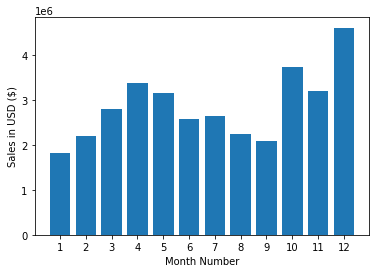

In [18]:
# plot the data in bar chart form
import matplotlib.pyplot as plt # importing graph making library
months = range(1,13)

plt.bar (months, Results['sales'])
plt.xticks(months) # to show number of each month for each bar in x axis
plt.ylabel("Sales in USD ($)")
plt.xlabel ("Month Number")
plt.show()

# Q2: Which city had highest number of sales?

 **Add another data column for city**
 
 see the Purchase Address column and you will se the city name within commas

 we will use **".apply "** method to split this city name from Purchase Address column and make City column

 **Standard Syantex **= **df["New Column Name"] = df['Target Column'].apply (lambda x: x.split(',')[index])**
 
 df => given data frame name in our case => year_data
    
lamda x =>  the command for value detection and temporarily store, technically saying it will detect the cell content

x.split => is the given operation name for value  temporarily store means split

(',') => is the condition for split 

index => position or index or word of value you wnat to split and write in new column

In [19]:
year_data['City'] = year_data['Purchase Address'].apply(lambda x: x.split(',')[1])
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City


In [20]:
# another method to get the same results but with more generic approach

def get_city(address):
    return address.split(',')[1]
def get_state(address):   # because only city name is not sufficent so we also need state name to avoide any error if there is any same city name in differet state/country
    return address.split(',')[2].split(' ')[1]    # first split will get the 2nd index (state name + post code), 2nd split will get only state name and will drop the post code

year_data['City'] = year_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY


In [21]:
City_Sale_Results = year_data.groupby('City').sum()
City_Sale_Results

,Quantity Ordered,Price Each,Month,sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


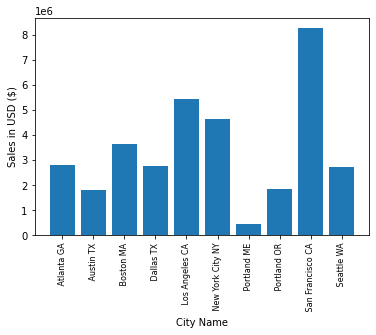

In [22]:
# plot the city sale data in bar chart form

import matplotlib.pyplot as plt # importing graph making library

cities = [city for city, df in year_data.groupby('City')]  # this step is for arrangment of city names according to city column in data set other wise it can mix the citywise sales 

plt.bar (cities, City_Sale_Results['sales'])
plt.xticks(cities, rotation='vertical', size=8) # to show number of each month for each bar in x axis
plt.ylabel("Sales in USD ($)")
plt.xlabel ("City Name")
plt.show()

**Q3 = What is best time for advertisement to increase the sales?**

In [23]:
# first need to split time column from "Order Date" column in data set

year_data['Order Date'] = pd.to_datetime(year_data['Order Date']) # to change the style of  "Order Date" column so it make easy to split time

year_data['Hour'] = year_data['Order Date'].dt.hour  # to get the "hour" from "Order Date" column
year_data['Minute'] = year_data['Order Date'].dt.minute # to get the "minute" from "Order Date" column
year_data['count'] = 1 # for all rows of data set
year_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute,count
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,22,21,1
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,15,11,1
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,14,40,1
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,20,59,1
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,19,53,1


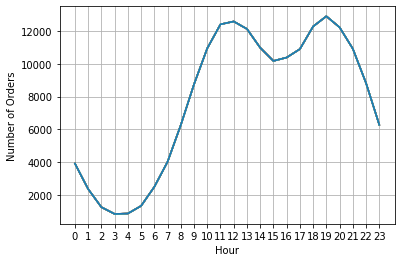

In [24]:
# now plot it in line chart form

Hours = [Hour for Hour, df in year_data.groupby('Hour')]
plt.plot(Hours, year_data.groupby(['Hour']).count())
plt.xticks(Hours)
plt.ylabel("Number of Orders")
plt.xlabel ("Hour")
plt.grid()
plt.show()

**Q4: What product are most often Sold Together?**

In [25]:
# this can be done by finding duplicate order IDs in data frame and then arrange them

df = year_data[year_data['Order ID'].duplicated(keep = False)] 

# df = new data frame, it will find/store duplicated Oreder IDs from year_data, False = print all elemnts of "Product" while duplicate



df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute,count
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco CA,20,12,1
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco CA,20,12,1
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco CA,9,28,1
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco CA,9,28,1
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City NY,10,17,1
63,236730,Wired Headphones,1,11.99,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,11.99,New York City NY,10,17,1
132,236799,Google Phone,1,600.00,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",8,600.00,San Francisco CA,12,38,1
133,236799,Wired Headphones,1,11.99,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",8,11.99,San Francisco CA,12,38,1
163,236829,Vareebadd Phone,1,400.00,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",8,400.00,Los Angeles CA,8,51,1
164,236829,USB-C Charging Cable,1,11.95,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",8,11.95,Los Angeles CA,8,51,1


In [26]:
# now we will Group the products with same Orders IDs and make new column


df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: (',').join(x) )

# Grouped = New Column, it will group the Order IDs, and in paralle collect values from "Product" column and join then with comma sperator
# dont worry about error "Try using .loc[row_indexer,col_indexer] = value instead" 
df = df[['Order ID', 'Grouped']].drop_duplicates() # it will drop the rows with similar entries

df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"


In [27]:
# now we need to import further libraries

from itertools import combinations
from collections import Counter


count = Counter()
for row in df['Grouped']:    # row = list
    row_list = row.split(',') # row_list = sublist
    count.update(Counter(combinations(row_list, 2))) # 2 = two number of items 
    

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Q5 = What Product sold the Most and Why?**

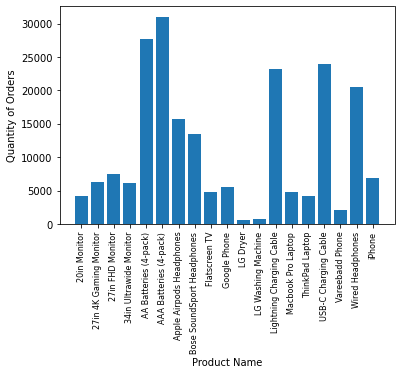

In [28]:
# as per strategy we need to sum the "Quantity Ordered" while lookup "Product"

product_group = year_data.groupby('Product')
Quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product , df in product_group ]

plt.bar(products, Quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel("Quantity of Orders")
plt.xlabel ("Product Name")
plt.show()


**Q6 = What is relationship between Most saled products and their prices?**

In [29]:
prices = year_data.groupby("Product").mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


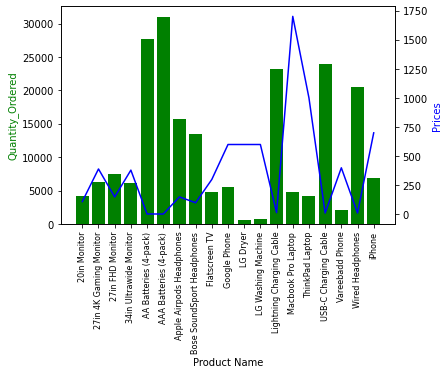

In [30]:
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#import matplotlib.ticker as mticker

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar (products, Quantity_ordered, color='green')
ax2.plot (products, prices, 'b')
ax1.set_xlabel ("Product Name")
ax1.set_ylabel ("Quantity_Ordered", color = 'g')
ax2.set_ylabel ("Prices", color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()